In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import pickle
from sklearn.linear_model import LinearRegression, Lasso
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\OWNER1\Desktop\Nenchin\WORKS\Python\py-master\DataScience\BangloreHomePrices\model\bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data Cleaning

In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1 = df[["location","size","total_sqft","bath","price"]]
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df1.dropna(inplace=True)
df1.isnull().sum()

C:\Users\OWNER1\AppData\Local\Temp\ipykernel_6644\2400609255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df1.shape

(13246, 5)

# Feature Engineering

In [9]:
df1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df1["bhk"] = df1['size'].apply(lambda x: int(x.split(" ")[0]))

C:\Users\OWNER1\AppData\Local\Temp\ipykernel_6644\3513007895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["bhk"] = df1['size'].apply(lambda x: int(x.split(" ")[0]))


In [11]:
df1.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [12]:
df1[df1.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df1[~df1["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
def convert_to_float(x):
    token = x.split("-")
    if len(token) == 2:
        return (float(token[0])+(float(token[1])))/2
    try:
        return float(x)
    except:
        return None

In [16]:
df2 = df1.copy()
df2["total_sqft"] = df2["total_sqft"].apply(convert_to_float)

In [17]:
df2.head(31)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [18]:
df3 = df2.copy()
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [19]:
df3["price_per_sqft"] = round(((df3["price"]*100000)/df3["total_sqft"]),ndigits=3)
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.811
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.385
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.891
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000


In [20]:
len(df3.location.unique()) # number of locations

1304

In [21]:
df3["location"] = df3["location"].apply(lambda x: x.strip())
#group by location and get the value count of each location
loc_stat = df3.groupby("location")["location"].agg("count").sort_values(ascending=False)
print(loc_stat)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64


In [22]:
len(loc_stat[loc_stat<=10]) #number of locations with value less than or equal to 10

1052

# Dimensionality reduction

In [23]:
loc_stat_less_10 = loc_stat[loc_stat<=10] #select any location with value less than or equal to 10
loc_stat_less_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [24]:
len(df3["location"].unique())

1293

In [25]:
df3["location"] = df3["location"].apply(lambda x: "other" if x in loc_stat_less_10 else x)
len(df3["location"].unique())

242

In [26]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.811
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.385
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.891
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.510


# Removing outliers

In [27]:
df3[(df3["total_sqft"]/df3["bhk"])<300].head() #using 300sqft per bedroom as the threshold

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.510
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.981
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000


In [28]:
df3.shape

(13246, 7)

In [29]:
df4 = df3[~((df3["total_sqft"]/df3["bhk"])<300)]
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.811
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.385
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.891
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000


In [30]:
df4.shape

(12502, 7)

In [31]:
df4["price_per_sqft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127335
min         267.830000
25%        4210.526000
50%        5294.118000
75%        6916.667000
max      176470.588000
Name: price_per_sqft, dtype: float64

In [32]:
#Using mean and standard deviation
def remove_ppsqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf["price_per_sqft"])
        st = np.std(subdf["price_per_sqft"])
        reduced_df = subdf[(subdf["price_per_sqft"]>(m-st)) & (subdf["price_per_sqft"]<=(m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
        
    return df_out

In [33]:
df5 = remove_ppsqft_outliers(df4)
print(df5.shape)

(10241, 7)


In [34]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.544
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.806


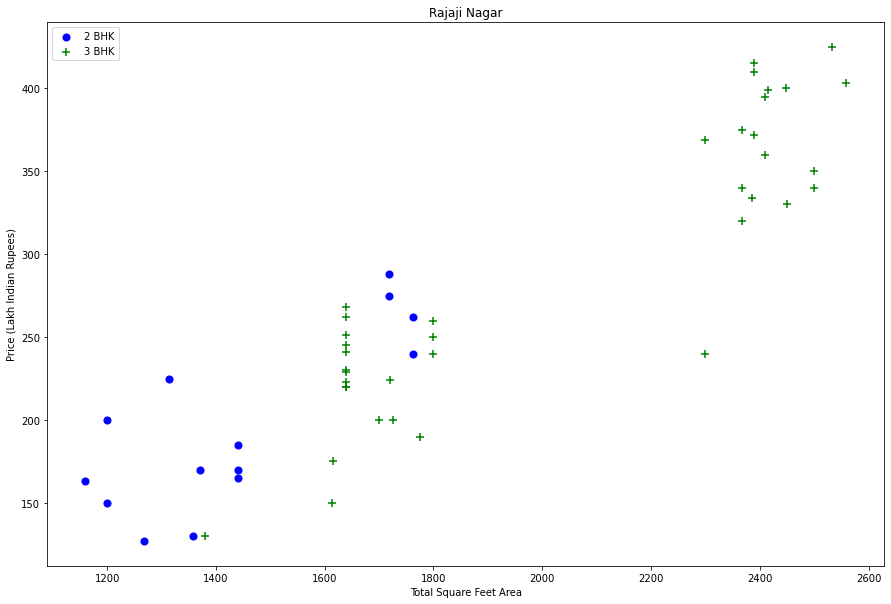

In [35]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize = (15,10))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

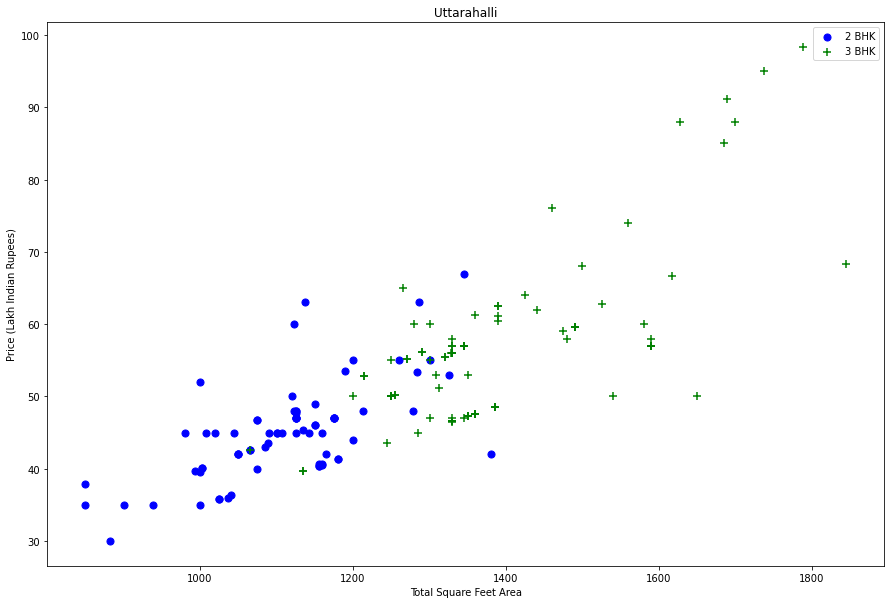

In [36]:
plot_scatter_chart(df5,"Uttarahalli")

In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [38]:
df6 = remove_bhk_outliers(df5)

In [39]:
df6.shape

(7329, 7)

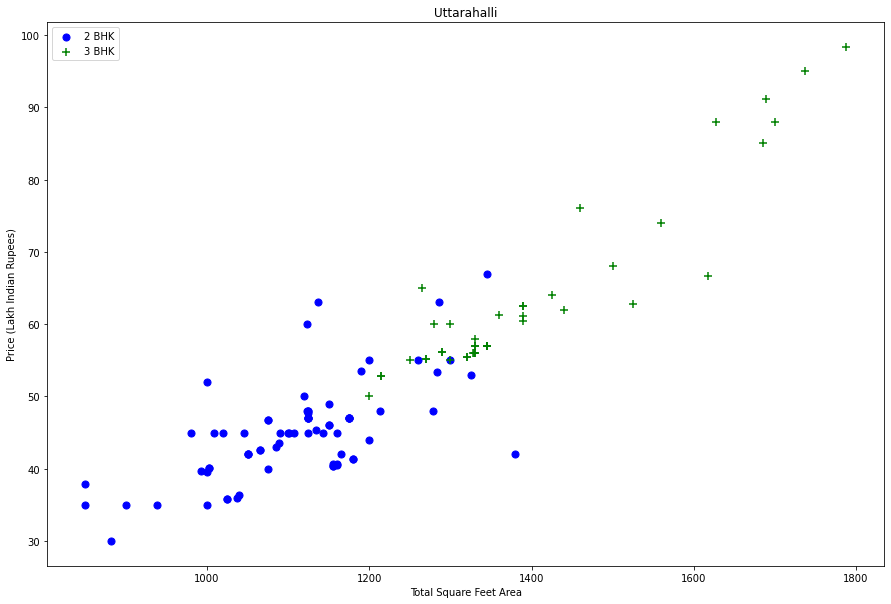

In [40]:
plot_scatter_chart(df6,"Uttarahalli")

Text(0, 0.5, 'Count')

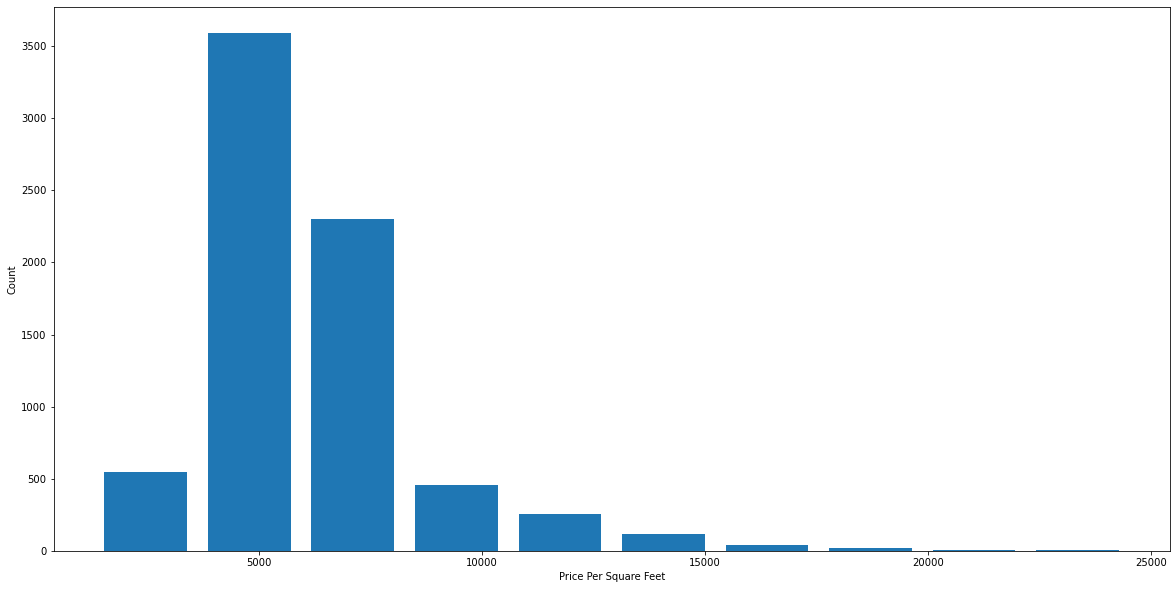

In [41]:
plt.figure(figsize = (20,10))
plt.hist(df6["price_per_sqft"],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [42]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [43]:
df6[df6["bath"]>10] #Using bathroom numbers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124


Text(0, 0.5, 'Count')

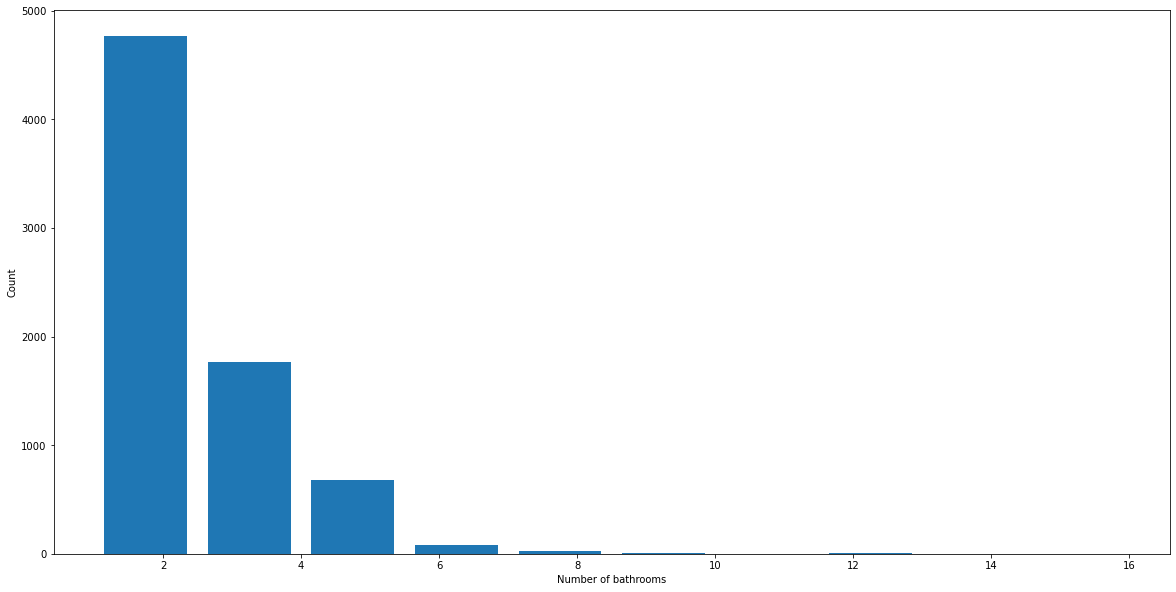

In [44]:
plt.figure(figsize=(20,10))
plt.hist(df6["bath"],rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [45]:
df6[df6["bath"]>df6["bhk"]+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.033
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.898


In [46]:
df7 = df6[df6["bath"]<df6["bhk"]+2]
df7.shape

(7251, 7)

In [47]:
df8 = df7.drop(["size","price_per_sqft"], axis=1)
df8.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [48]:
dummies = pd.get_dummies(df8["location"], drop_first=True)

In [49]:
df9 = pd.concat([df8,dummies], axis=1)
df9.head(10)

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,413.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,368.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,1500.0,5.0,85.0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,2065.0,4.0,210.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df10 = df9.drop(["location"], axis=1)
df10.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X = df10.drop(["price"], axis=1)
X.shape

(7251, 244)

In [52]:
y = df10["price"]
y.headd()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [57]:
linReg = LinearRegression()
linReg.fit(X_train,y_train)
linReg.score(X_test,y_test)

0.845227769787254

In [58]:
cv = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [62]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [63]:
find_best_model_using_gridsearchcv(X,y)

C:\Users\OWNER1\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\OWNER1\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model

C:\Users\OWNER1\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.699273,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.762419,"{'criterion': 'mse', 'splitter': 'best'}"


In [65]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return linReg.predict([x])[0]

In [69]:
predict_price('1st Phase JP Nagar',1000, 2, 3)

C:\Users\OWNER1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.72616900486521

In [71]:
with open("banglore_homeprice_pmodel.pickle","wb") as f:
    pickle.dump(linReg,f  )

In [72]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))